In [18]:
import numpy as np
import heapq
import matplotlib.pyplot as plt

%matplotlib inline


In [30]:
# A rectangle is (start, width)
# A list element is (-weight, (start, width))

def make_rect(a, b, f):
    """Make a rectangle for the interval [a, b]"""
    rect = (a, b-a)
    xm = a + rect[1] / 2.
    return (f(xm) * rect[1], rect)
    

def get_max_elem(lst, key = lambda x: -x[0]):
    """Find and remove the maximum element from the list.
    
    Find the max element (according to the parameter `key`, which is a callable),
    remove it from the list, and return both the element and the rest.
    """
    if key is None:
        # use the identity function
        key = lambda x: x
    
    # find the max element
    elem = max(lst, key=key)
    
    # find its position in the list
    idx = lst.index(elem)
    
    return elem, lst[:idx] + lst[idx+1:]

    
def adapt_rect_list(f, a, b, funcGetMax, npts):
    """Integrate f(x) from a to b using npts steps of the adaptive algorithm.
    """
    lst = []

    # start from a single rectangle
    item = make_rect(a, b, f)
    lst.append(item)
    
    # loop
    for _ in range(npts):
        # get the largest one
        rect, lst = funcGetMax(lst)
        w, (start, width) = rect
                
        # and split it into two halves
        c = start + width / 2.
        
        rect1 = make_rect(start, c, f)
        rect2 = make_rect(c, start + width, f)
        
        lst.append(rect1)
        lst.append(rect2)
        
    # collect the answer
    return -sum(w for w, r in lst), lst

In [37]:
def get_max_element_heapq(lst):
    heapq.heapify(lst)
    
    return lst[-1], lst[:-1]

def crect(f, a, b, npts):
    h = (b - a) / npts
    summ = 0
    for j in range(npts):
        x = a + h*(j + 0.5)
        summ += f(x)
    return summ * h

def f(x):
    
    return (np.exp(-x))

def getExact(f,a, b):
    return (-f(b)+f(a))

def exact(a, b):
    """Define the exact value of integral"""
    return (-np.exp(-b)+np.exp(-a))
    #return (-np.exp(-b)*(b+1)-(-np.exp(-a)*(a+1)))

In [38]:
for n in (10, 100, 1000, 10000):
    print("%5.5g : %g" % (n, crect(lambda x: x**3, 0, 1, n) - getExact(lambda x: x**3,0, 1) ))

   10 : 1.24875
  100 : 1.24999
 1000 : 1.25
10000 : 1.25


In [40]:
a, b = 0, 20

for n in (5, 25, 125, 250, 500, 1000, 5000):
    res, lst = adapt_rect_list(f, a, b, get_max_element_heapq, n)
    print ('n, res = ', n, res)

n, res =  5 -0.7921436846593407
n, res =  25 -0.9903744105507674
n, res =  125 -0.9995254841578629
n, res =  250 -0.9997636401049373
n, res =  500 -0.9998166847139779
n, res =  1000 -0.9998277637078664
n, res =  5000 -0.9998400734567691


In [42]:
%timeit adapt_rect_list(f, a, b, get_max_element_heapq, npts=1000)

100 ms ± 4.03 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


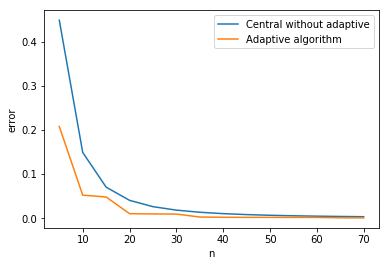

In [70]:
res1 = []
res2 = []

a, b = 0, 20
npts = [i*5 for i in range(1,15)]
for n in npts:
    res1.append(abs(abs(crect(f,a,b,n))-getExact(f,a,b)))
    res2.append(abs(abs(adapt_rect_list(f, a, b, get_max_element_heapq, n)[0])-getExact(f,a,b)))
   

plt.plot(npts,res1,label = 'Central without adaptive')
plt.plot(npts,res2,label = 'Adaptive algorithm')


plt.xlabel('n')
plt.ylabel('error')
plt.legend()
